### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

| No. | Variable Name      | Description                                                                                 | Type        |
|-----|--------------------|---------------------------------------------------------------------------------------------|-------------|
| 1   | car_ID             | Unique id of each observation                                                               | Integer     |
| 2   | symboling          | Assigned insurance risk rating (+3: risky, -3: safe)                                        | Categorical |
| 3   | CarName            | Name of car company and model                                                               | Categorical |
| 4   | fueltype           | Car fuel type (gas or diesel)                                                               | Categorical |
| 5   | aspiration         | Aspiration used in a car                                                                    | Categorical |
| 6   | doornumber         | Number of doors in a car                                                                    | Categorical |
| 7   | carbody            | Body of car                                                                                 | Categorical |
| 8   | drivewheel         | Type of drive wheel                                                                         | Categorical |
| 9   | enginelocation     | Location of car engine                                                                      | Categorical |
| 10  | wheelbase          | Wheelbase of car                                                                            | Numeric     |
| 11  | carlength          | Length of car                                                                               | Numeric     |
| 12  | carwidth           | Width of car                                                                                | Numeric     |
| 13  | carheight          | Height of car                                                                               | Numeric     |
| 14  | curbweight         | Weight of car without occupants or baggage                                                  | Numeric     |
| 15  | enginetype         | Type of engine                                                                              | Categorical |
| 16  | cylindernumber     | Number of cylinders in the car                                                              | Categorical |
| 17  | enginesize         | Size of car engine                                                                          | Numeric     |
| 18  | fuelsystem         | Fuel system of car                                                                          | Categorical |
| 19  | boreratio          | Bore ratio of car                                                                           | Numeric     |
| 20  | stroke             | Stroke or volume inside the engine                                                          | Numeric     |
| 21  | compressionratio   | Compression ratio of car                                                                    | Numeric     |
| 22  | horsepower         | Horsepower                                                                                  | Numeric     |
| 23  | peakrpm            | Car peak rpm                                                                                | Numeric     |
| 24  | citympg            | Mileage in city                                                                             | Numeric     |
| 25  | highwaympg         | Mileage on highway                                                                          | Numeric     |
| 26  | price              | Price of car (Dependent variable)                                                           | Numeric     |

In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv('carPrice_assignment.csv')

# Evaluate the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (205, 26)


In [2]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [3]:
print("\nFirst 5 rows:\n", df.head(5))


First 5 rows:
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  pe

In [4]:
print (df['CarName'])

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object


In [5]:
# Split 'CarName' into 'CompanyName' and 'CarModel' using the first space
df[['CompanyName', 'CarModel']] = df['CarName'].str.split(pat=' ', n=1, expand=True)
print(df[['CarName', 'CompanyName', 'CarModel']].head())

                    CarName  CompanyName      CarModel
0        alfa-romero giulia  alfa-romero        giulia
1       alfa-romero stelvio  alfa-romero       stelvio
2  alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio
3               audi 100 ls         audi        100 ls
4                audi 100ls         audi         100ls


In [6]:
# Drop the original 'CarName' column
df.drop('CarName', axis=1, inplace=True)

In [7]:
df.shape

(205, 27)

In [8]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 40)

Unique values in 'fueltype':
['gas' 'diesel']
----------------------------------------
Unique values in 'aspiration':
['std' 'turbo']
----------------------------------------
Unique values in 'doornumber':
['two' 'four']
----------------------------------------
Unique values in 'carbody':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
----------------------------------------
Unique values in 'drivewheel':
['rwd' 'fwd' '4wd']
----------------------------------------
Unique values in 'enginelocation':
['front' 'rear']
----------------------------------------
Unique values in 'enginetype':
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
----------------------------------------
Unique values in 'cylindernumber':
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
----------------------------------------
Unique values in 'fuelsystem':
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
----------------------------------------
Unique values in 'CompanyName':
['alfa-romero' 'audi

In [9]:
# Map word numbers to integers
door_map = {'two': 2, 'four': 4}
df['doornumber'] = df['doornumber'].map(door_map).astype(int)
print(df['doornumber'].unique())

[2 4]


In [10]:

df.CompanyName = df.CompanyName.str.lower()

def renameStringValue(a,b):
    df.CompanyName.replace(a,b,inplace=True)

renameStringValue('toyouta','toyota')
renameStringValue('porcshce','porsche')
renameStringValue('vw','volkswagen')
renameStringValue('vokswagen','volkswagen')
renameStringValue('maxda','mazda')

df.CompanyName.unique()

/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_44560/2940138245.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CompanyName.replace(a,b,inplace=True)


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
df.head(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,CarModel
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [12]:
#car id is not required for prediction
df.drop('car_ID', axis=1, inplace=True)

In [13]:
print(df.isnull().sum())

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CompanyName         0
CarModel            2
dtype: int64


In [14]:
df1 = df.copy()
#let's apply dummy encoding to categorical variables
df1 = pd.get_dummies(df1, drop_first=True)  


In [15]:
print(df1.shape)
print(df1.columns)
df1.head(5)
#car model is not required for prediction
df1 = df.copy()
df1.drop('CarModel', axis=1, inplace=True)  


(205, 205)
Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'CarModel_vega 2300', 'CarModel_versa', 'CarModel_x1', 'CarModel_x3',
       'CarModel_x4', 'CarModel_x5', 'CarModel_xf', 'CarModel_xj',
       'CarModel_xk', 'CarModel_z4'],
      dtype='object', length=205)


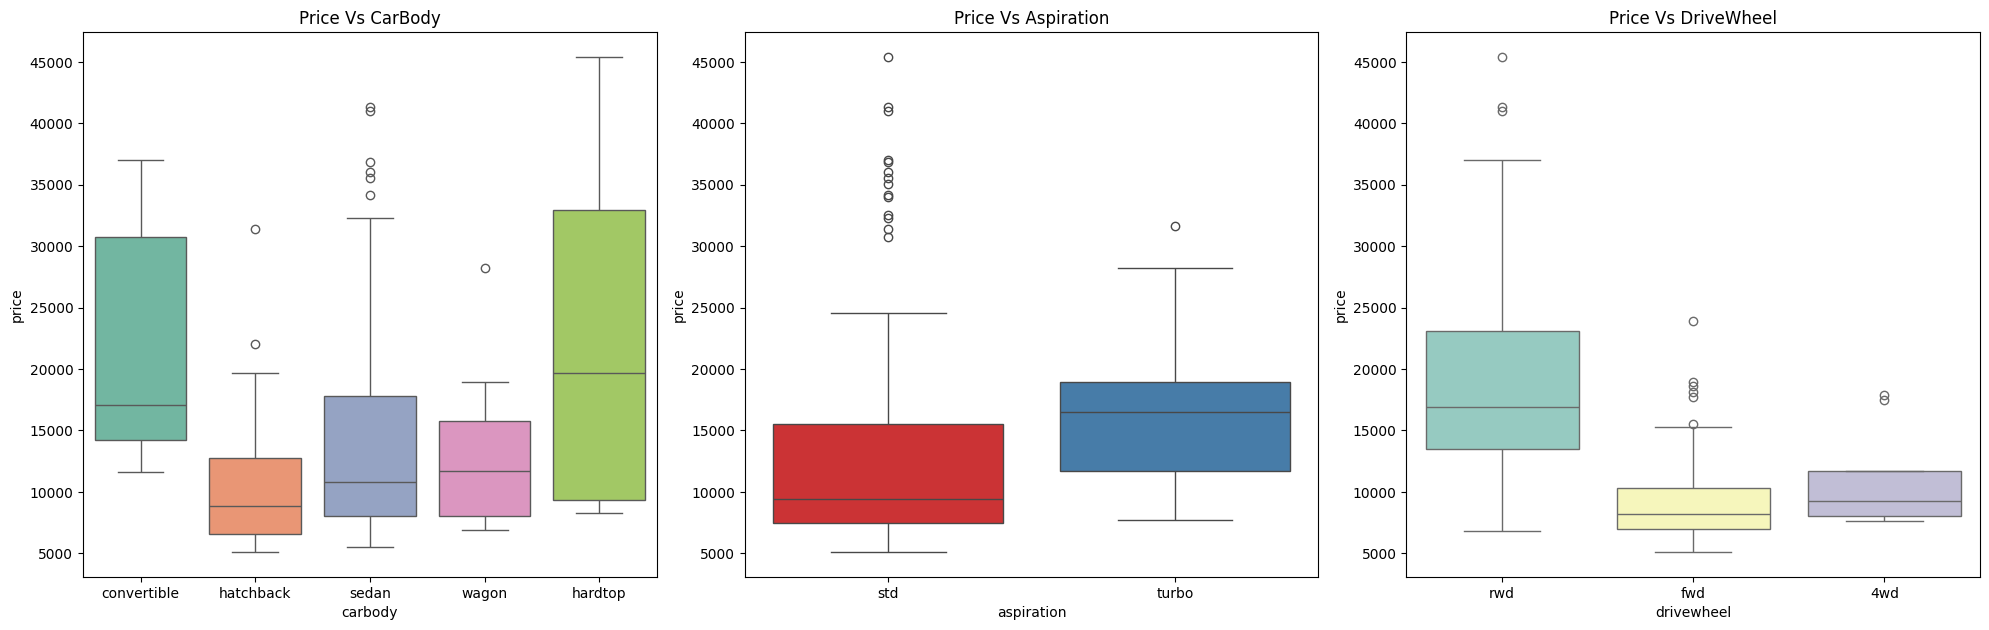

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title('Price Vs CarBody')
sns.boxplot(x='carbody', y='price', data=df, hue='carbody', palette='Set2', legend=False)
plt.subplot(2,3,2)
plt.title('Price Vs Aspiration')
sns.boxplot(x='aspiration', y='price', data=df, hue='aspiration', palette='Set1', legend=False)
plt.subplot(2,3,3)
plt.title('Price Vs DriveWheel')
sns.boxplot(x='drivewheel', y='price', data=df, hue='drivewheel', palette='Set3', legend=False)
plt.tight_layout()
plt.show()


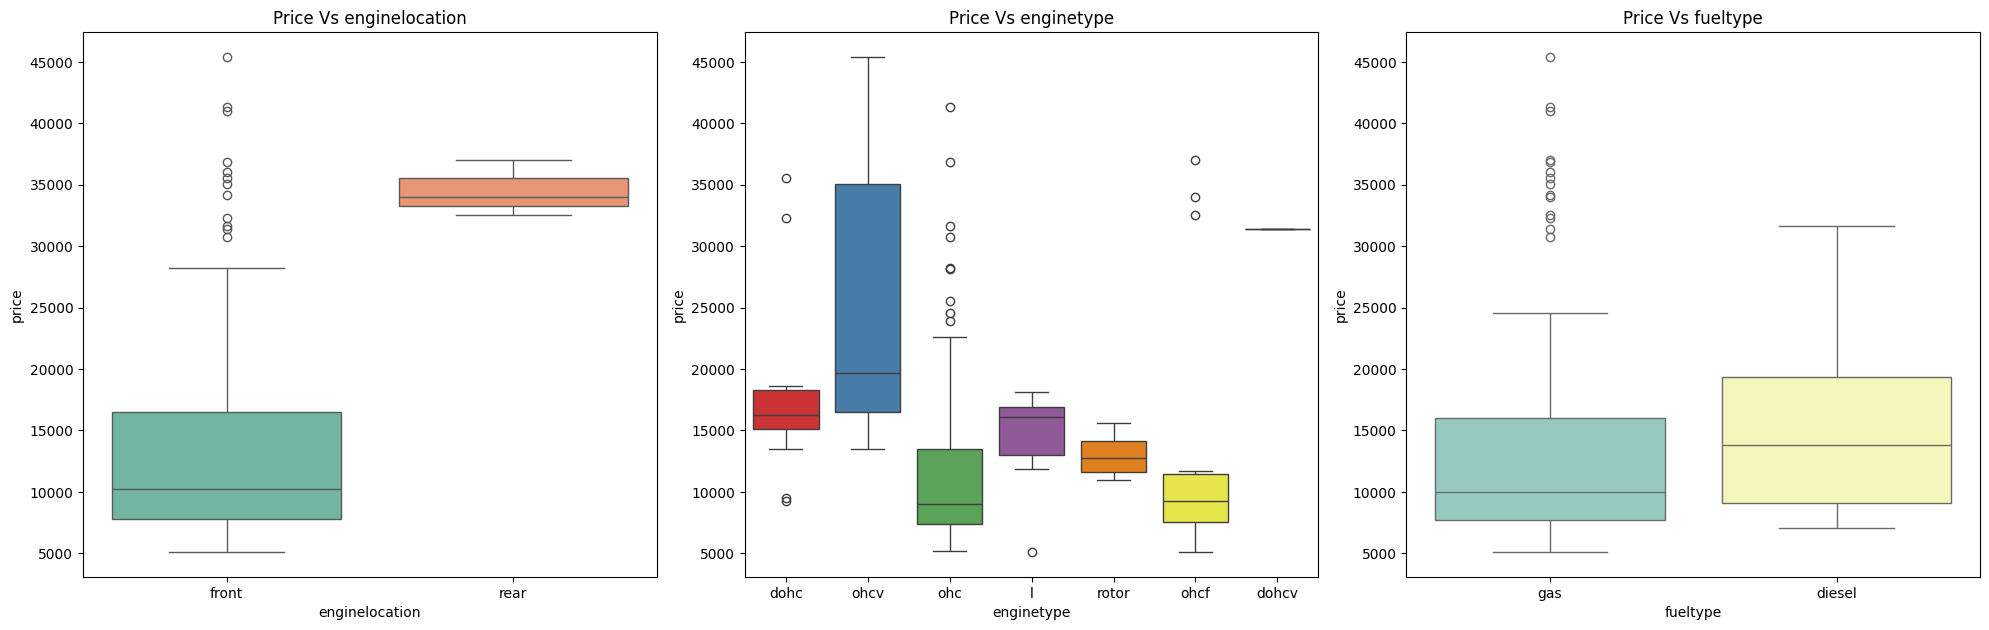

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title('Price Vs enginelocation')
sns.boxplot(x='enginelocation', y='price', data=df, hue='enginelocation', palette='Set2', legend=False)
plt.subplot(2,3,2)
plt.title('Price Vs enginetype')
sns.boxplot(x='enginetype', y='price', data=df, hue='enginetype', palette='Set1', legend=False)
plt.subplot(2,3,3)
plt.title('Price Vs fueltype')
sns.boxplot(x='fueltype', y='price', data=df, hue='fueltype', palette='Set3', legend=False)
plt.tight_layout()
plt.show()

/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_44560/260746176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=df, palette='Set2')
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_44560/260746176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=df, palette='Set2')
/var/folders/3n/wlk9mt2n68q585d43py36nk80000gn/T/ipykernel_44560/260746176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='price', data=df, palette='Set2')
/var/folders/3n/wlk9mt2n68q585d43py36

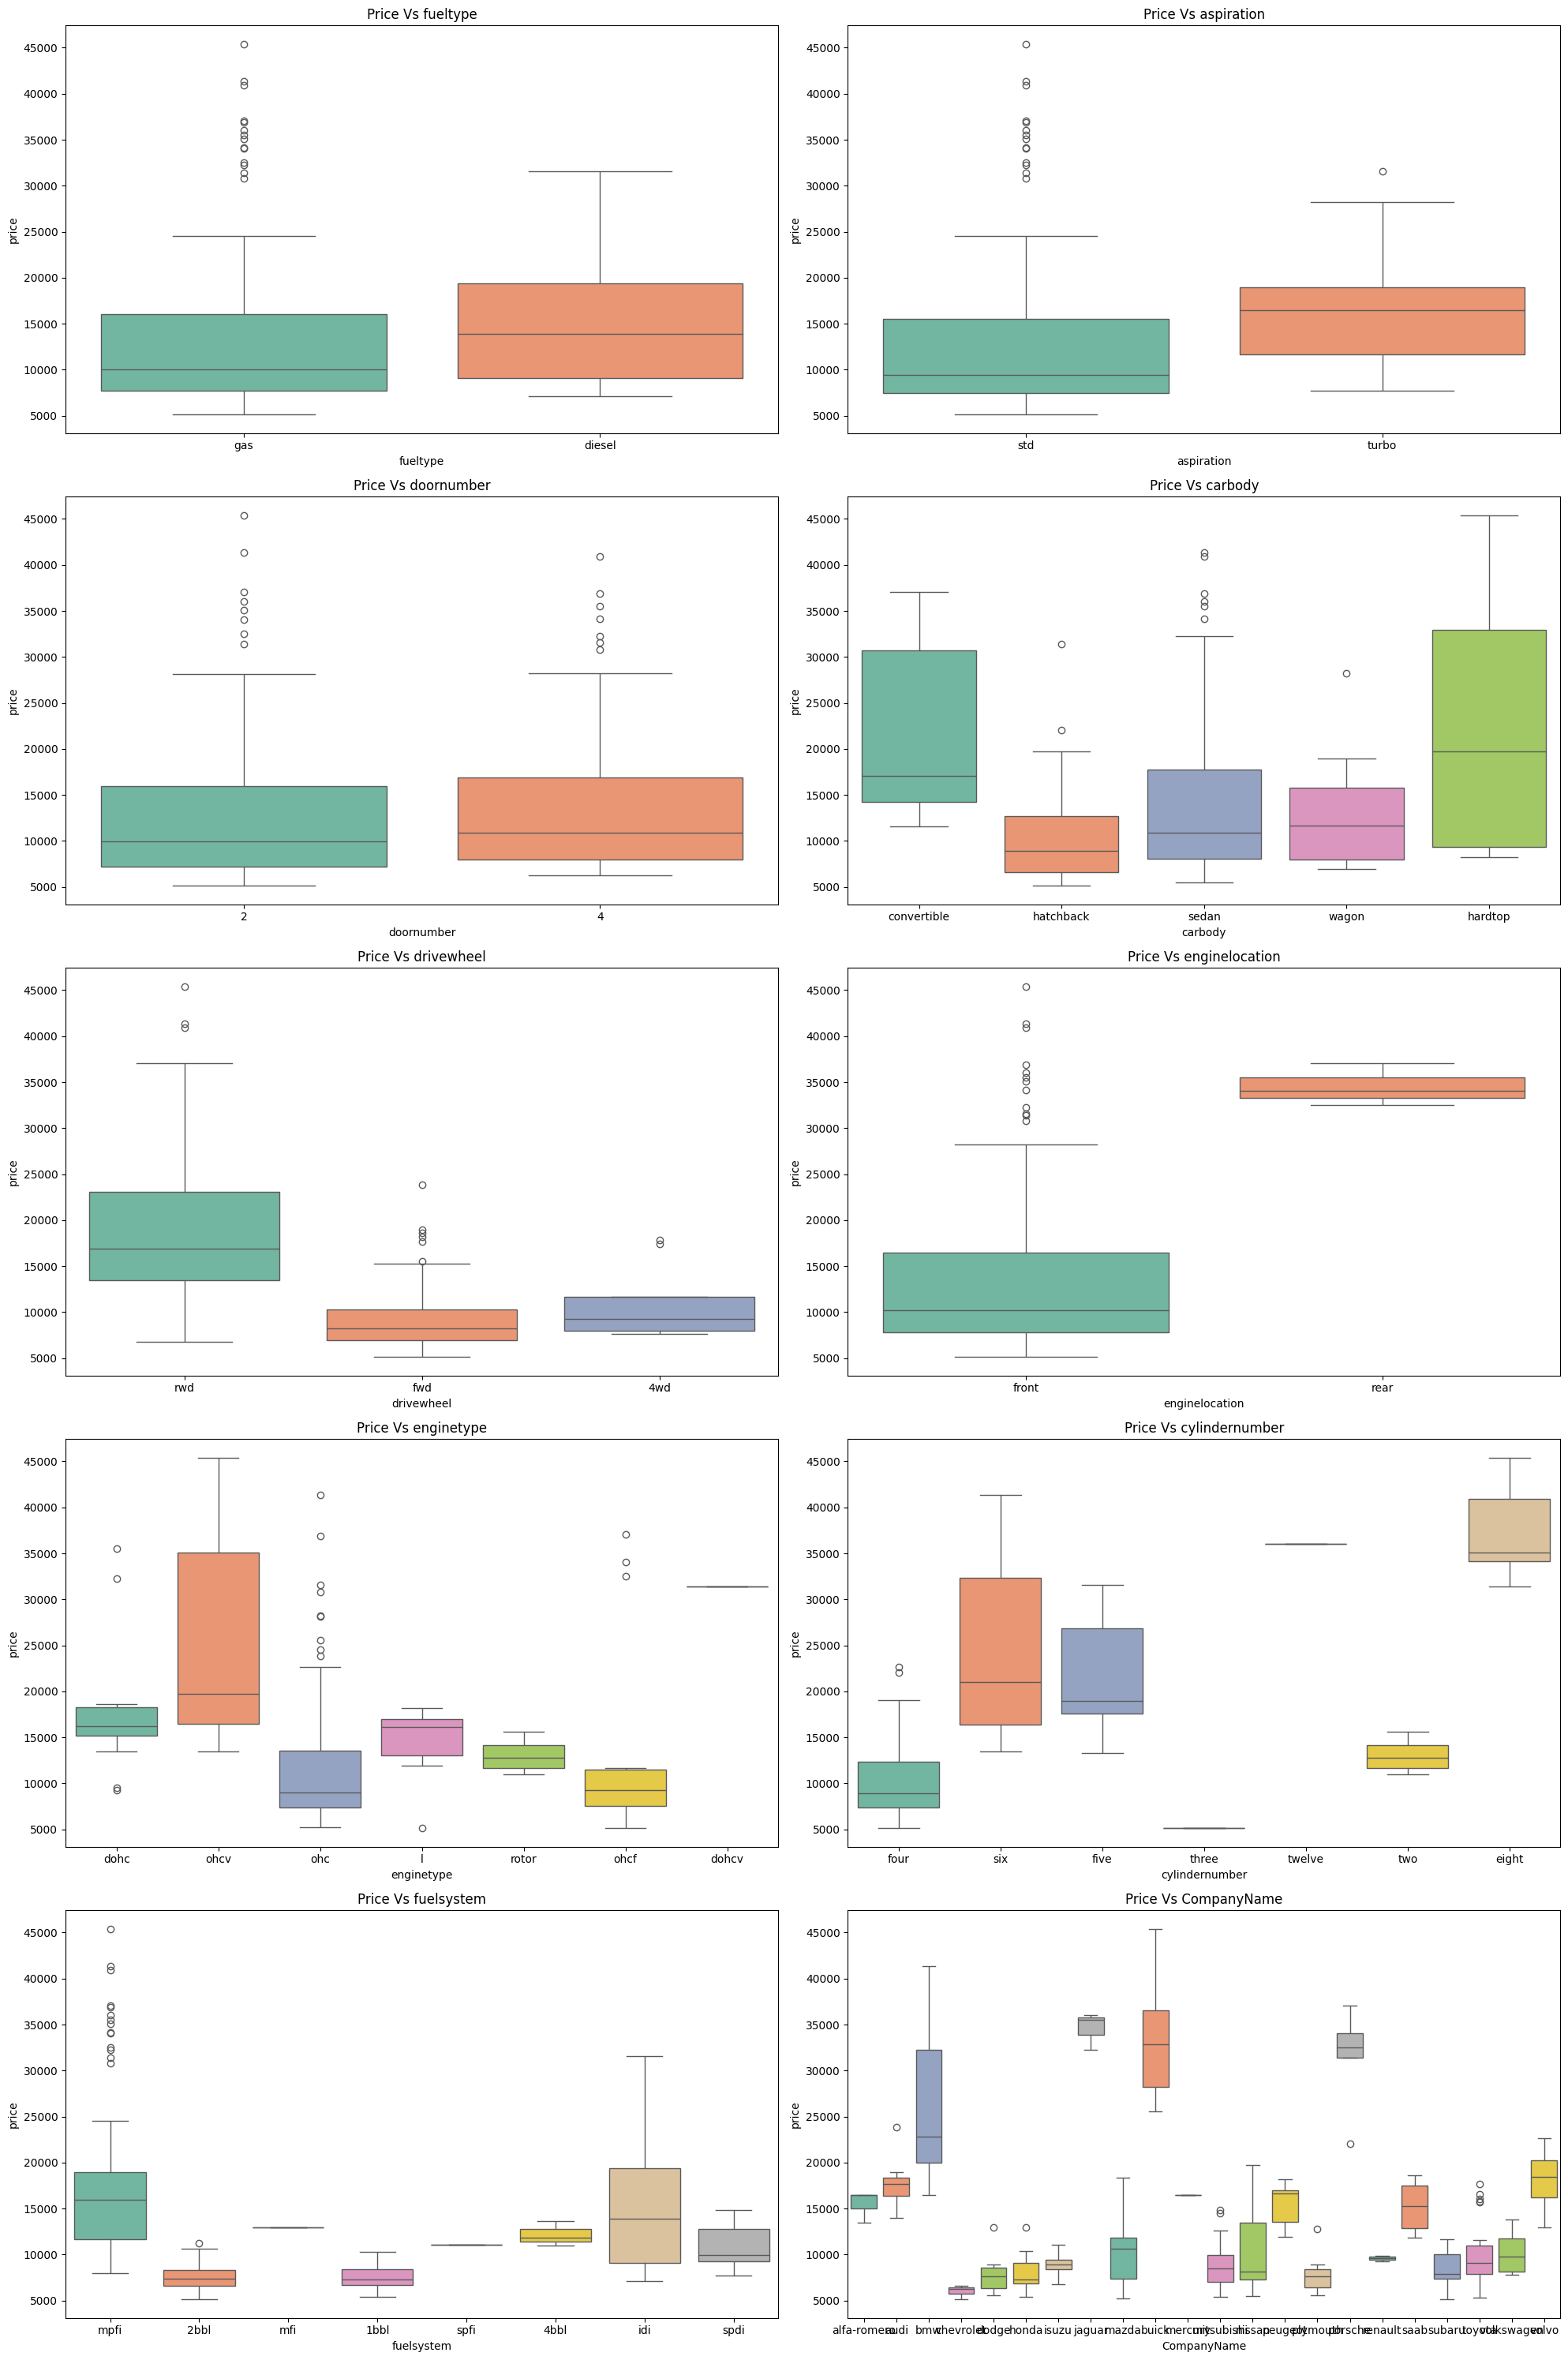

In [18]:
plt.figure(figsize=(20, 30))
plot_idx = 1
for col in categorical_cols:
    if col == 'CarModel':
        continue
    plt.subplot(5, 2, plot_idx)
    plt.title(f'Price Vs {col}')
    sns.boxplot(x=col, y='price', data=df, palette='Set2')
    plot_idx += 1
plt.tight_layout()
plt.show()


### Concise Analysis Based on Boxplot Charts

- **Car Body:** Convertibles and hardtops tend to have higher median prices, while hatchbacks and wagons are generally lower-priced.
- **Aspiration:** Cars with turbo aspiration tend to be priced higher than those with standard aspiration.
- **Drive Wheel:** Rear-wheel drive (RWD) and four-wheel drive (4WD) cars are generally more expensive than front-wheel drive (FWD) cars.
- **Engine Location:** Cars with rear engine locations are significantly more expensive than those with front engines.
- **Engine Type:** Certain engine types (like OHCV and rotor) are associated with higher prices, while OHC and L engines are generally lower-priced.
- **Fuel Type:** Diesel cars tend to have slightly higher prices than gasoline cars.
- **Other Categorical Variables:** Variables such as `CompanyName`, number of cylinders, and fuel system also show noticeable variation in price. Some brands and configurations command premium pricing.

**Overall:** Car price is strongly influenced by body style, aspiration, drive configuration, engine location, and brand.


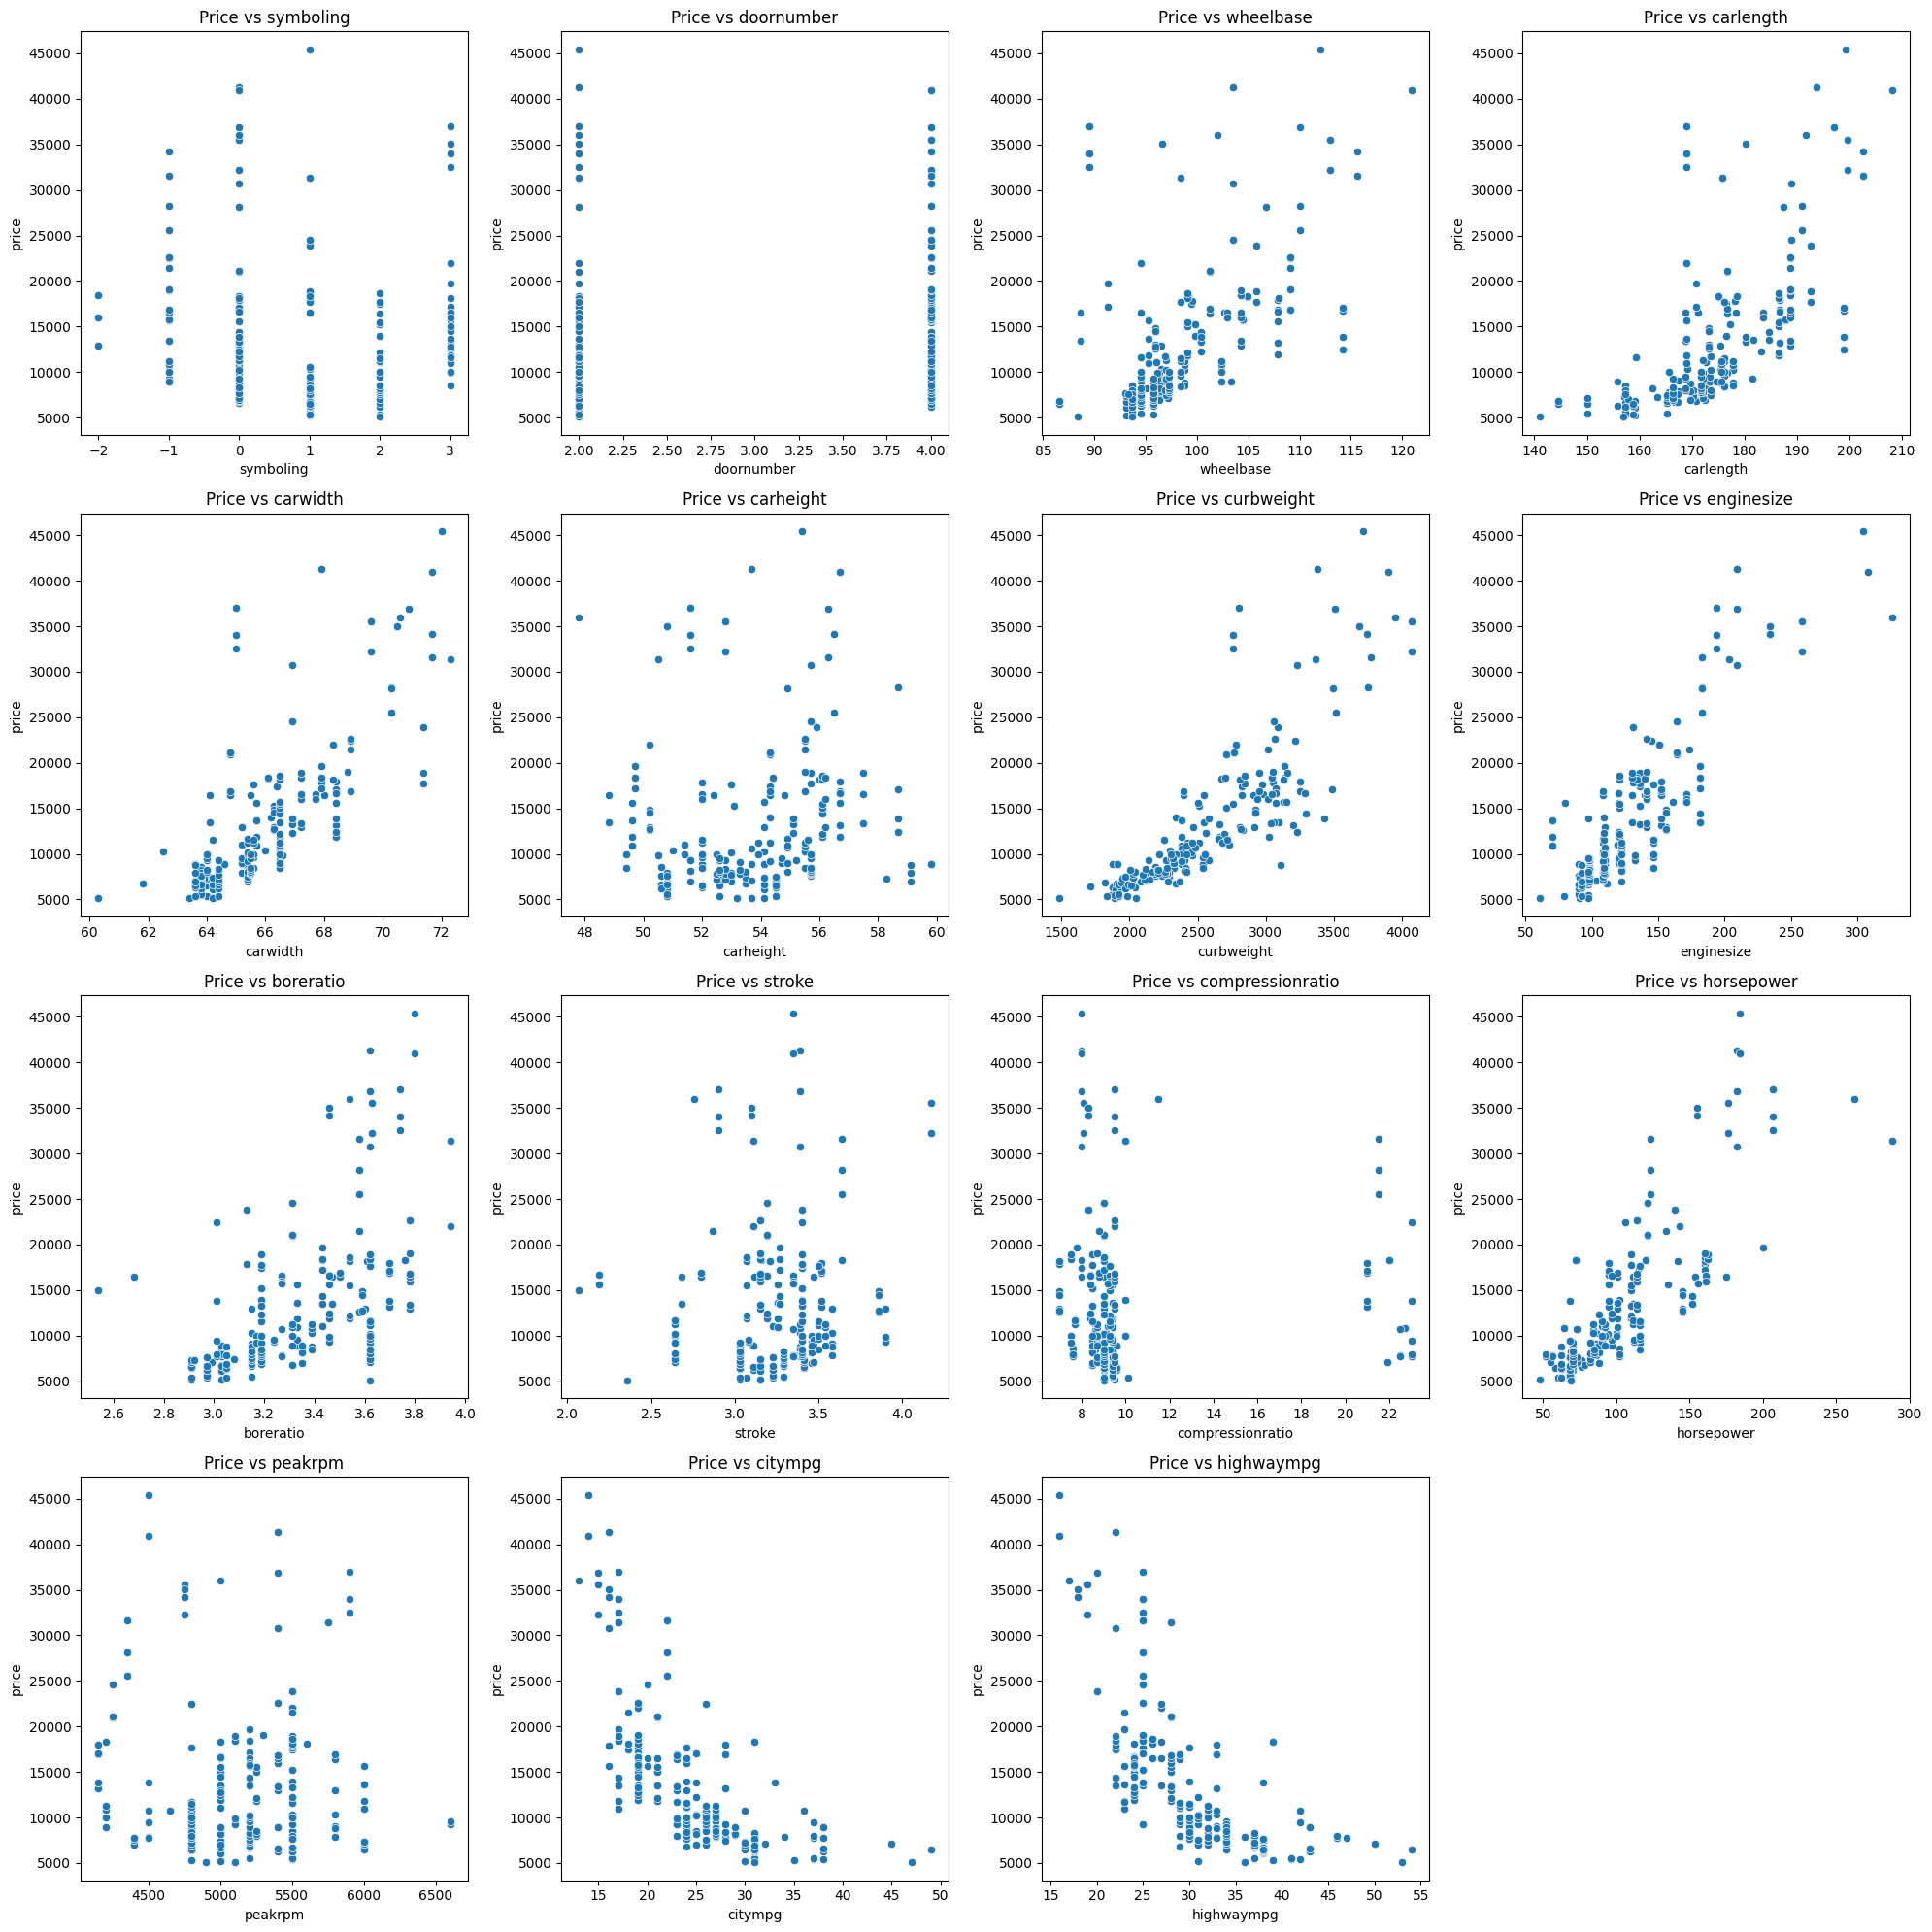

In [19]:
import seaborn as sns

# Select only numerical columns (excluding 'price' for x-axis)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, idx)
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'Price vs {col}')
    plt.tight_layout()
plt.show()

### Analysis of Numerical Features and Correlation with Car Price

#### Highly Positively Correlated Features
- **curbweight, enginesize, horsepower, carwidth, wheelbase, carlength:**  
    These features show a strong positive correlation with price. As these values increase, the car price tends to increase as well. This is expected, as larger, more powerful cars are generally more expensive.

#### Negatively Correlated Features
- **citympg, highwaympg:**  
    These features are negatively correlated with price. Higher mileage (mpg) is often found in more economical, lower-priced cars, while luxury or performance cars tend to have lower mpg and higher prices.

#### Features to Consider for Elimination
- **Highly Correlated Features (Potential Multicollinearity):**
    - **curbweight, enginesize, carlength, carwidth, wheelbase** are all measures of car size or weight and are likely to be highly correlated with each other. Including all of them may introduce multicollinearity, which can distort model coefficients.
    - **citympg and highwaympg** are also likely to be highly correlated, as cars that are efficient in the city are usually efficient on the highway as well.

- **Features with Low or No Correlation:**
    - **symboling, peakrpm, compressionratio, stroke:**  
        These features show little to no clear relationship with price and may be considered for elimination unless domain knowledge suggests otherwise.

#### Multicollinearity Concerns
- **Multicollinearity** is likely among the following:
    - **curbweight, enginesize, carlength, carwidth, wheelbase**
    - **citympg, highwaympg**
- To address this, consider:
    - Checking the correlation matrix or using Variance Inflation Factor (VIF) to quantify multicollinearity.
    - Removing or combining highly correlated features to improve model interpretability and performance.

---

**Summary:**  
Focus on retaining the most relevant and least redundant features. Remove or combine highly correlated variables to avoid multicollinearity, and drop features with little predictive power for price.

In [20]:
df1.shape

(205, 25)

In [21]:
df1.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CompanyName'],
      dtype='object')

In [22]:

categorical_cols = categorical_cols.drop('CarModel')
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName'],
      dtype='object')

In [23]:
# One-hot encode categorical columns and drop the original columns
df_encoded = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)
print(df_encoded.shape)
print(df_encoded.columns)

(205, 65)
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_4', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'Com

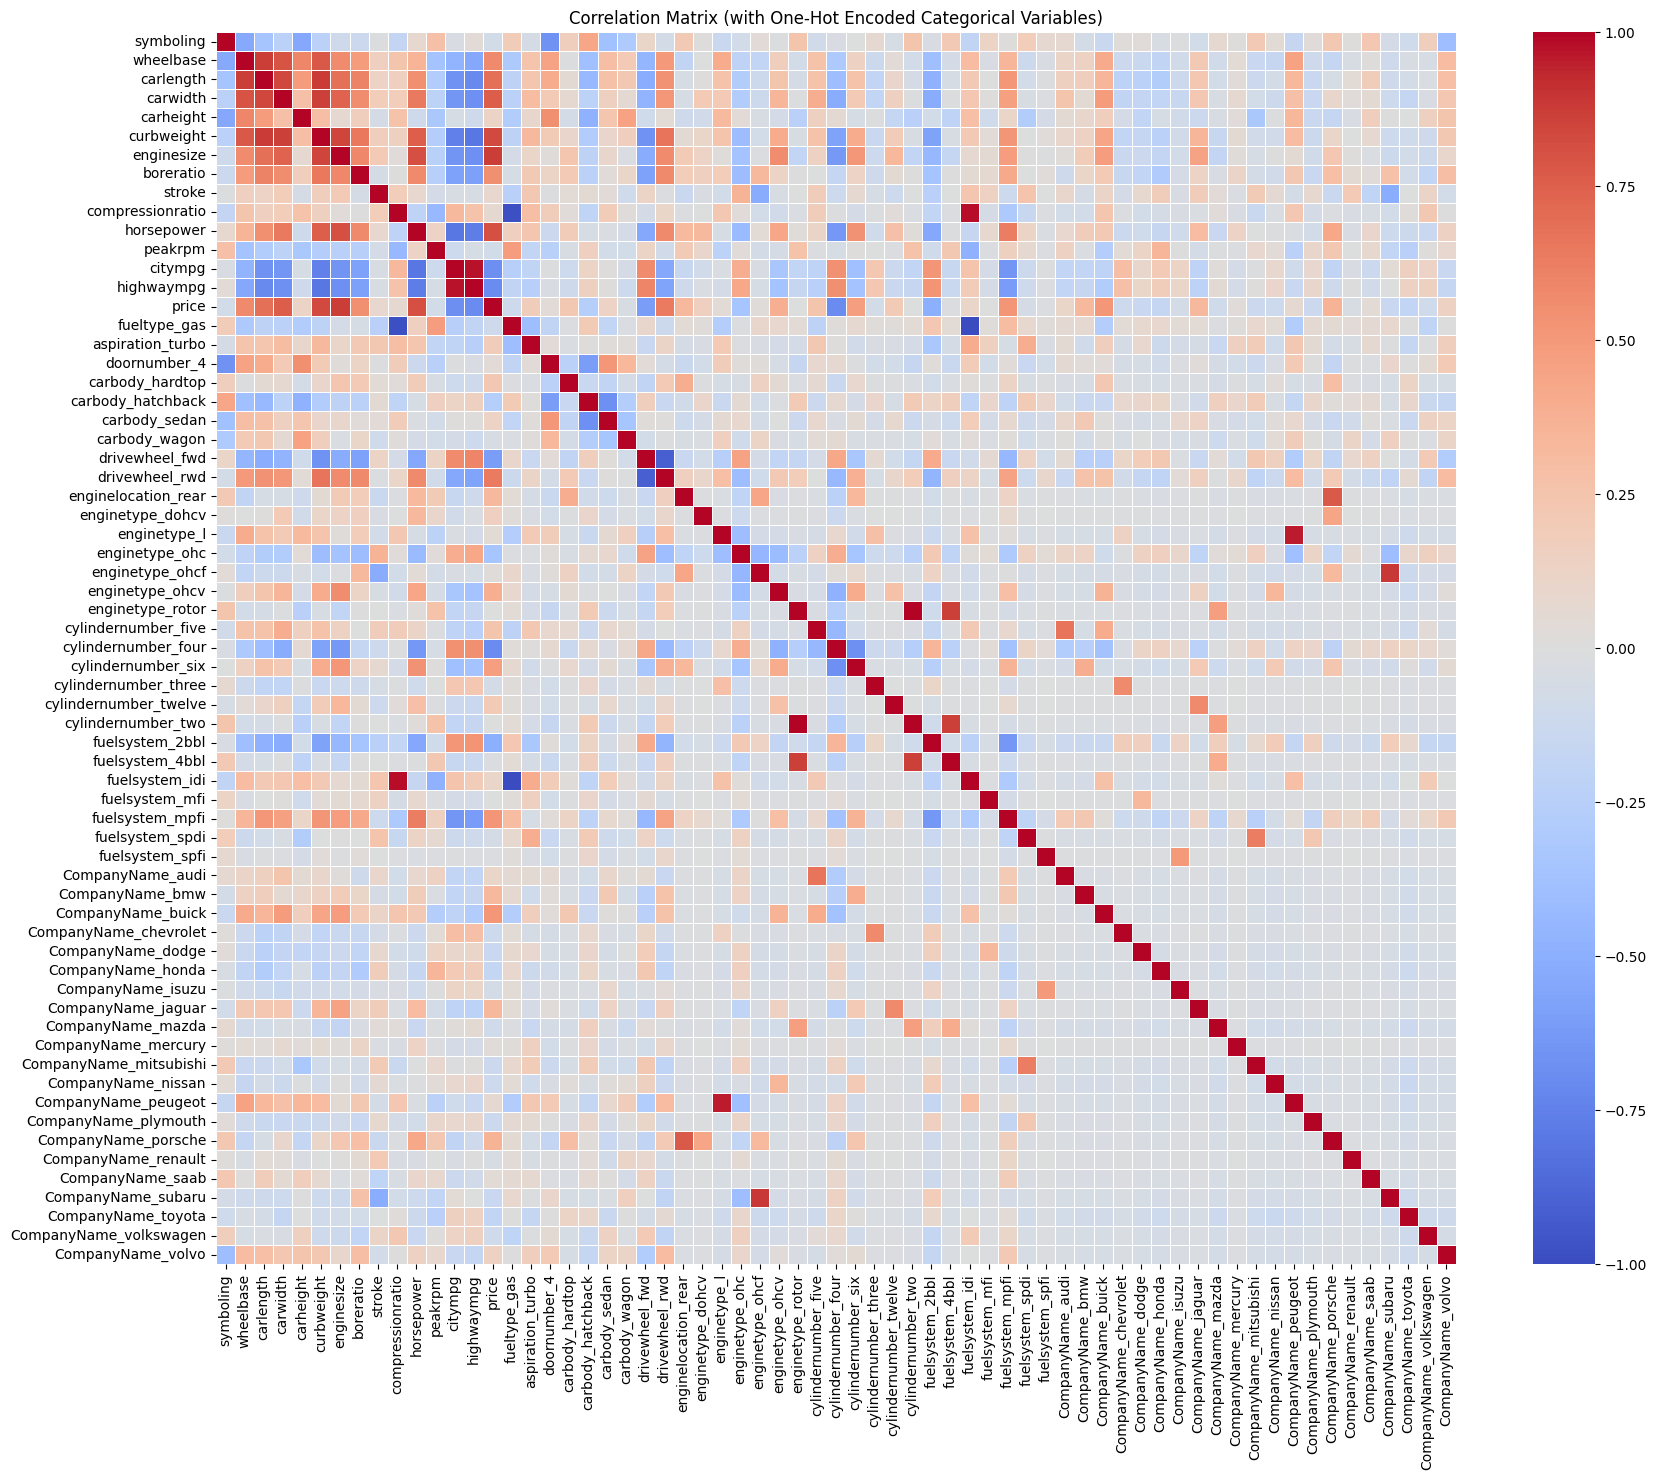

In [24]:
# Compute the correlation matrix for the encoded dataframe
corr_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (with One-Hot Encoded Categorical Variables)')
plt.show()

# Correlation Analysis for 'highwaympg' (from correlation matrix and heatmap)

- 'highwaympg' shows a strong negative correlation with 'price' (as highwaympg increases, price tends to decrease).
- It is also highly negatively correlated with features like 'curbweight', 'enginesize', 'horsepower', 'carlength', and 'carwidth'.
- This suggests that cars with higher fuel efficiency (higher highwaympg) are generally lighter, have smaller engines, and are less powerful—characteristics typical of lower-priced, economy cars.
- Conversely, luxury or performance cars tend to have lower highwaympg, higher weight, larger engines, and higher prices.
- There is also a strong positive correlation between 'highwaympg' and 'citympg', indicating that cars efficient on the highway are also efficient in the city.
- Due to these high correlations, including both 'citympg' and 'highwaympg' in a regression model may introduce multicollinearity.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from IPython.display import display, HTML

# ...existing code to compute vif_data...

# Display VIF in a scrollable box


# Calculate VIF for all features except the target variable 'price'
X = df_encoded.drop('price', axis=1)

# Convert boolean columns to int (0/1)
X = X.astype({col: int for col in X.select_dtypes(include='bool').columns})

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by='VIF', ascending=False, inplace=True)


display(HTML(vif_data.to_html(max_rows=1000, max_cols=100)))

/Users/vijiashok/Documents/phd_practice_lab/.venv311/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
29,enginetype_rotor,inf
27,enginetype_ohcf,inf
60,CompanyName_subaru,inf
25,enginetype_l,inf
55,CompanyName_peugeot,inf
23,enginelocation_rear,inf
33,cylindernumber_three,inf
35,cylindernumber_two,inf
14,fueltype_gas,1.329188e+04
38,fuelsystem_idi,1.803873e+03


In [26]:
# Drop columns from X where VIF > 10
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
X_reduced = X.drop(columns=high_vif_features)
print(f"Dropped columns (VIF > 10): {high_vif_features}")
print(f"New shape of X: {X_reduced.shape}")

Dropped columns (VIF > 10): ['enginetype_rotor', 'enginetype_ohcf', 'CompanyName_subaru', 'enginetype_l', 'CompanyName_peugeot', 'enginelocation_rear', 'cylindernumber_three', 'cylindernumber_two', 'fueltype_gas', 'fuelsystem_idi', 'compressionratio', 'cylindernumber_four', 'enginesize', 'horsepower', 'citympg', 'curbweight', 'cylindernumber_six', 'highwaympg', 'fuelsystem_mpfi', 'fuelsystem_2bbl', 'cylindernumber_five', 'carlength', 'carbody_sedan', 'CompanyName_toyota', 'drivewheel_rwd', 'wheelbase', 'enginetype_ohc', 'CompanyName_honda', 'carbody_hatchback', 'boreratio', 'CompanyName_volvo', 'CompanyName_buick', 'carwidth', 'CompanyName_nissan', 'CompanyName_mazda', 'CompanyName_porsche', 'CompanyName_bmw', 'CompanyName_mitsubishi', 'drivewheel_fwd', 'CompanyName_volkswagen', 'carbody_wagon', 'CompanyName_audi']
New shape of X: (205, 22)


In [27]:
# Filter features with VIF between 5 and 10 (inclusive)
vif_5_10 = vif_data[(vif_data['VIF'] >= 5) & (vif_data['VIF'] <= 10)]
print(vif_5_10)

                  feature       VIF
47      CompanyName_dodge  9.443182
41        fuelsystem_spdi  9.424719
34  cylindernumber_twelve  8.501951
59       CompanyName_saab  8.434487
4               carheight  7.613596
50     CompanyName_jaguar  7.496680
56   CompanyName_plymouth  7.322017
24       enginetype_dohcv  7.078842
15       aspiration_turbo  6.636155
0               symboling  6.557911
8                  stroke  6.438411
11                peakrpm  6.318591
37        fuelsystem_4bbl  6.266050
28        enginetype_ohcv  6.164391
49      CompanyName_isuzu  5.209931


In [28]:
# Filter features with VIF between 5 and 10 (inclusive)
vif_5 = vif_data[(vif_data['VIF'] < 5)]
print(vif_5)

                  feature       VIF
46  CompanyName_chevrolet  4.764755
16           doornumber_4  3.854772
17        carbody_hardtop  3.555484
58    CompanyName_renault  3.231958
52    CompanyName_mercury  2.780848
42        fuelsystem_spfi  2.357774
39         fuelsystem_mfi  2.306388


In [29]:
# Filter features with VIF between 5 and 10 (inclusive)
# There are no features with VIF == 'inf', so vif_inf will be an empty DataFrame
vif_inf = vif_data[vif_data['VIF'] == float('inf')]
print(vif_inf)

                 feature  VIF
29      enginetype_rotor  inf
27       enginetype_ohcf  inf
60    CompanyName_subaru  inf
25          enginetype_l  inf
55   CompanyName_peugeot  inf
23   enginelocation_rear  inf
33  cylindernumber_three  inf
35    cylindernumber_two  inf


In [30]:
# Drop columns from X_reduced that have VIF == inf
inf_features = vif_inf['feature'].tolist()
inf_features = [col for col in inf_features if col in X_reduced.columns]
X_reduced = X_reduced.drop(columns=inf_features)
print(f"Dropped columns with VIF == inf: {inf_features}")
print(f"Shape of X_reduced after dropping: {X_reduced.shape}")

Dropped columns with VIF == inf: []
Shape of X_reduced after dropping: (205, 22)


In [31]:
#Lets calculate VIF again after dropping high VIF features
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
vif_data_reduced.sort_values(by='VIF', ascending=False, inplace=True)   
display(HTML(vif_data_reduced.to_html(max_rows=1000, max_cols=100)))


,feature,VIF
1,carheight,234.735983
2,stroke,145.538667
3,peakrpm,120.623878
5,doornumber_4,4.849690
0,symboling,3.256894
4,aspiration_turbo,1.787316
17,CompanyName_jaguar,1.777460
9,cylindernumber_twelve,1.734571
12,fuelsystem_spdi,1.600153
16,CompanyName_isuzu,1.372975


In [32]:
# Drop 'carheight', 'stroke', and 'peakrpm' from X_reduced
X_reduced = X_reduced.drop(columns=['carheight', 'stroke', 'peakrpm'])
print(X_reduced.shape)
print(X_reduced.columns)

(205, 19)
Index(['symboling', 'aspiration_turbo', 'doornumber_4', 'carbody_hardtop',
       'enginetype_dohcv', 'enginetype_ohcv', 'cylindernumber_twelve',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_isuzu', 'CompanyName_jaguar', 'CompanyName_mercury',
       'CompanyName_plymouth', 'CompanyName_renault', 'CompanyName_saab'],
      dtype='object')


In [33]:
#Lets calculate VIF again after dropping high VIF features
vif_data_reduced1 = pd.DataFrame()
vif_data_reduced1['feature'] = X_reduced.columns
vif_data_reduced1['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
vif_data_reduced1.sort_values(by='VIF', ascending=False, inplace=True)   
display(HTML(vif_data_reduced1.to_html(max_rows=1000, max_cols=100)))


,feature,VIF
6,cylindernumber_twelve,1.610237
1,aspiration_turbo,1.577166
14,CompanyName_jaguar,1.533362
0,symboling,1.524567
9,fuelsystem_spdi,1.455960
13,CompanyName_isuzu,1.355147
10,fuelsystem_spfi,1.346792
2,doornumber_4,1.278876
12,CompanyName_dodge,1.177030
8,fuelsystem_mfi,1.174010


In [34]:
# Drop 'carheight', 'stroke', and 'peakrpm' from X_reduced
X_reduced = X_reduced.drop(columns=['symboling', 'doornumber_4'])
print(X_reduced.shape)
print(X_reduced.columns)

(205, 17)
Index(['aspiration_turbo', 'carbody_hardtop', 'enginetype_dohcv',
       'enginetype_ohcv', 'cylindernumber_twelve', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mercury', 'CompanyName_plymouth',
       'CompanyName_renault', 'CompanyName_saab'],
      dtype='object')


In [35]:
#Lets calculate VIF again after dropping high VIF features
vif_data_reduced2 = pd.DataFrame()
vif_data_reduced2['feature'] = X_reduced.columns
vif_data_reduced2['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]
vif_data_reduced2.sort_values(by='VIF', ascending=False, inplace=True)   
display(HTML(vif_data_reduced2.to_html(max_rows=1000, max_cols=100)))


,feature,VIF
4,cylindernumber_twelve,1.584415
12,CompanyName_jaguar,1.500000
0,aspiration_turbo,1.394899
11,CompanyName_isuzu,1.333333
8,fuelsystem_spfi,1.333333
7,fuelsystem_spdi,1.331361
10,CompanyName_dodge,1.146206
6,fuelsystem_mfi,1.146206
3,enginetype_ohcv,1.097398
14,CompanyName_plymouth,1.068100


In [36]:
y = df_encoded['price']  # Target variable
X = X_reduced            # Cleaned predictors (after dropping high-VIF columns)

In [37]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model1

In [38]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7.745
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.78e-13
Time:                        11:21:56   Log-Likelihood:                -1648.1
No. Observations:                 164   AIC:                             3332.
Df Residuals:                     146   BIC:                             3388.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.133e+

# Model2
dropping the variables those are higher than 0.5

In [39]:

# Drop 'carheight', 'stroke', and 'peakrpm' from X_reduced
X_reduced1 = X_reduced.drop(columns=['cylindernumber_twelve', 'fuelsystem_4bbl', 'fuelsystem_mfi','fuelsystem_spdi','fuelsystem_spfi','CompanyName_chevrolet', 'CompanyName_isuzu', 'CompanyName_mercury', 'CompanyName_renault','CompanyName_saab', 'CompanyName_renault'])
print(X_reduced1.shape)
print(X_reduced1.columns)

(205, 7)
Index(['aspiration_turbo', 'carbody_hardtop', 'enginetype_dohcv',
       'enginetype_ohcv', 'CompanyName_dodge', 'CompanyName_jaguar',
       'CompanyName_plymouth'],
      dtype='object')


In [40]:
y = df_encoded['price']  # Target variable
X = X_reduced1            # Cleaned predictors (after dropping high-VIF columns)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
# Then reset index to avoid OLS alignment error
X_train_const = sm.add_constant(X_train.reset_index(drop=True))
y_train_reset = y_train.reset_index(drop=True)

# Fit model
model2 = sm.OLS(y_train_reset, X_train_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     18.25
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.32e-17
Time:                        11:21:56   Log-Likelihood:                -1651.8
No. Observations:                 164   AIC:                             3320.
Df Residuals:                     156   BIC:                             3344.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.126e+04 

#Test the model

In [43]:
import statsmodels.api as sm

X_test_const = sm.add_constant(X_test)
test_model = sm.OLS(y_test, X_test_const).fit()
print(test_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.431
Date:                Tue, 01 Jul 2025   Prob (F-statistic):             0.0542
Time:                        13:01:05   Log-Likelihood:                -424.84
No. Observations:                  41   AIC:                             861.7
Df Residuals:                      35   BIC:                             872.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.124e+04 

/Users/vijiashok/Documents/phd_practice_lab/.venv311/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


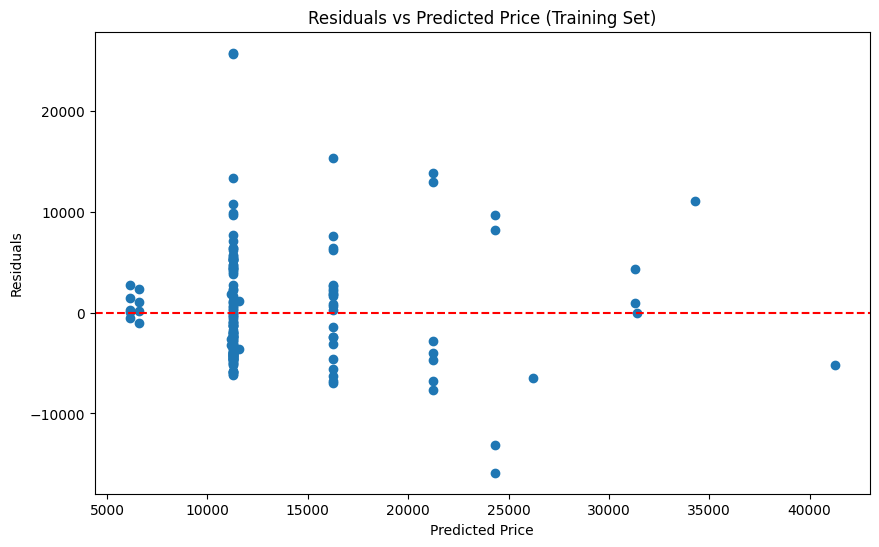

In [45]:
# Calculate residuals for the training set
y_train_pred = model2.predict(X_train_const)
residuals = y_train_reset - y_train_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (Training Set)')
plt.show()

In [ ]:
# Calculate residuals for the test set
y_test_pred = test_model.predict(X_test_const)
test_residuals = y_test - y_test_pred

# Plot residuals for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, test_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (Test Set)')
plt.show()

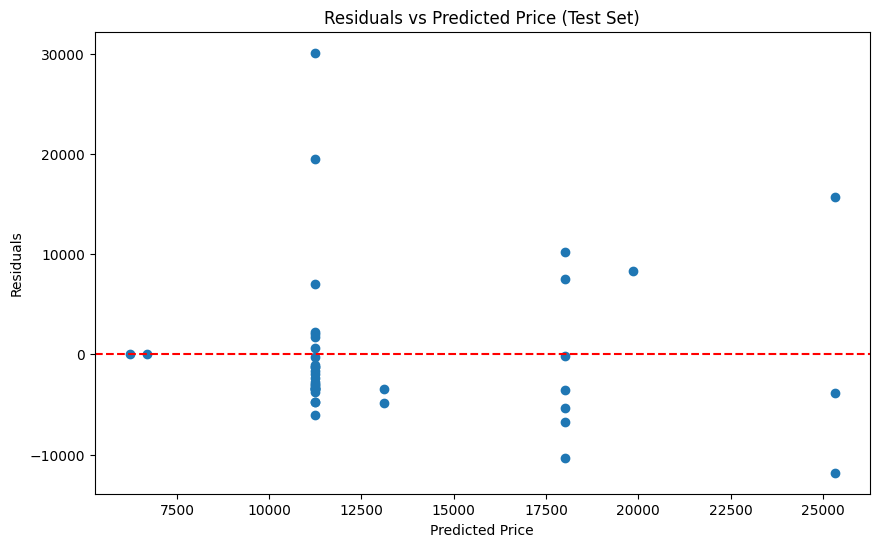

In [46]:
# Calculate residuals for the test set
y_test_pred = test_model.predict(X_test_const)
test_residuals = y_test - y_test_pred

# Plot residuals for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, test_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (Test Set)')
plt.show()

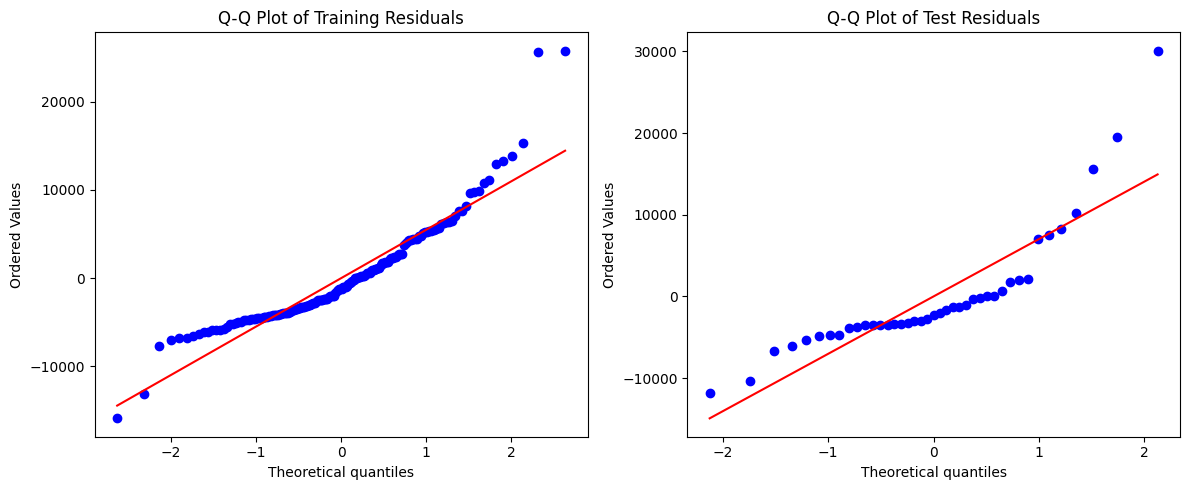

In [47]:
import scipy.stats as stats

# Q-Q plot for training residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Training Residuals')

# Q-Q plot for test residuals
plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Test Residuals')

plt.tight_layout()
plt.show()

### Detailed Analysis of Model Performance and Overfitting

#### 1. **Training vs. Test Performance**
- The training model achieves a high level of accuracy, as indicated by the small residuals and good fit on the training data.
- However, the test model performs poorly, with large residuals and significant prediction errors on unseen data.

#### 2. **Evidence of Overfitting**
- **Residual Plots:**  
    - Training residuals are relatively small and centered around zero, indicating the model fits the training data well.
    - Test residuals are much larger and more dispersed, showing the model fails to generalize to new data.
- **Prediction Consistency:**  
    - Many test predictions are clustered around a few values, suggesting the model is not capturing the true variability in the test set.

#### 3. **Feature Selection and Multicollinearity**
- **High VIF Features:**  
    - Many features (e.g., `enginesize`, `curbweight`, `carlength`, `carwidth`, `citympg`, `highwaympg`, etc.) were dropped due to high Variance Inflation Factor (VIF), indicating strong multicollinearity.
    - Removing these features can reduce overfitting but may also remove important predictive information if not done carefully.
- **Remaining Features:**  
    - The final model is left with mostly categorical variables and a few numerical ones with low VIF, which may not be sufficient to capture the complexity of car pricing.

#### 4. **Correlation Insights**
- **Numerical Features:**  
    - Features like `curbweight`, `enginesize`, `horsepower`, `carwidth`, and `carlength` are highly correlated with price but also with each other, leading to multicollinearity.
    - Fuel efficiency variables (`citympg`, `highwaympg`) are negatively correlated with price and highly correlated with each other.
- **Categorical Features:**  
    - Some categorical variables (e.g., `CompanyName`, `carbody`, `drivewheel`) show significant variation in price, but one-hot encoding can introduce many sparse features, increasing the risk of overfitting with limited data.

#### 5. **Recommendations for Improvement**
- **Regularization:**  
    - Use regularized regression methods (Ridge, Lasso) to penalize large coefficients and reduce overfitting.
- **Feature Engineering:**  
    - Consider combining or transforming highly correlated features (e.g., create a composite size index).
    - Use domain knowledge to retain the most meaningful predictors.
- **Model Complexity:**  
    - Avoid dropping too many informative features solely based on VIF; instead, balance multicollinearity reduction with predictive power.
- **Cross-Validation:**  
    - Use cross-validation to better estimate model performance and select features.

#### 6. **Summary**
- The current model overfits the training data and fails to generalize, mainly due to aggressive feature elimination and multicollinearity issues.
- A more balanced approach to feature selection, regularization, and validation is needed to improve test performance and model robustness.